# Rozwiązywanie równań nieliniowych

In [2]:
from typing import Callable, Tuple, Optional

In [3]:
def sign(number: float) -> int:
    '''Return -1 for negative number, 1 for positive and 0 if number is 0'''
    if number < 0:
        return -1
    elif number > 0:
        return 1
    else:
        return 0

def bisection(func: Callable[[float], float], start: float, end: float,
              tolerance: float = 1e-4, min_step: float = 1e-4) -> Tuple[float, float, int]:
    '''Return tuple (answer, determination_error) for function using bisection method.
    
    For the purposes of method analysis this function also returns number of steps.
    '''
    mid = (start + end) / 2
    start_value, end_value, mid_value = func(start), func(end), func(mid)
    start_sign, end_sign = sign(start_value), sign(end_value)
    step = 0
    
    while abs(mid_value) > tolerance and abs(start - end) >= min_step:
        mid_sign = sign(mid_value)
        if mid_sign == start_sign:
            start = mid
        else:
            end = mid
        mid = (start + end) / 2
        start_value, end_value, mid_value = func(start), func(end), func(mid)
        step += 1
    return (mid, abs(start - end) / 2, step)


In [4]:
def newton(f: Callable[[float], float], f_p: Callable[[float], float], start: float,
           tolerance: float = 1e-3, max_steps: float = 7) -> Tuple[Optional[float], int]:
    '''Return equation root using Newton–Raphson method.
    
    For the purposes of method analysis this function also returns number of steps.
    
    Arguments
    ---------
    f : Callable[[float], float]
        Function which root must be found.
    f_p : Callable[[float], float]
        Function derivative used for root calculation.
    start : float
        Start point.
    tolerance : float, default = 1e-3
        Tolerance. If value for calculated root will be less than tolerance value,
        such point will be considered as equation root and will be returned.
    max_steps : float, default = 7
        Maximum number of steps to determine root. If number of steps exceeds
        maximum - None will be returned.
    
    Returns
    -------
    Tuple[Optional[float], int]
        Calculated equation root (with some error) and number of steps
    '''
    
    x = start
    value = f(start)
    step = 0
    while abs(value) > tolerance and step < max_steps:
        step += 1
        x = x - value/f_p(x)
        value = f(x)
    if step == max_steps:
        return (None, step)
    else:
        return (x, step)


## Przykłady działania

In [5]:
from math import cos, e, pow, sin

def func1(x: float) -> float:
    return x**3 - x - 1

def func1_p(x: float) -> float:
    return 3 * x**2 - 1

def func2(x: float) -> float:
    return x**2 - 3

def func2_p(x: float) -> float:
    return 2 * x

def func3(x: float) -> float:
    return pow(e, -x) * (3.2 * sin(x) - 0.5 * cos(x))

In [6]:
print('\tBISECTION METHOD')

print(f'For function "x**3 - x - 1" on [1, 2]: {bisection(func1, 1, 2)[:2]}')

func2_x, func2_determination_error, func2_steps = bisection(func2, 1, 3, tolerance=1e-6)
print(f'For function "x*2 - 3" on [1, 3]: ({func2_x}, {func2_determination_error:.6f})')

func3_x, func3_determination_error, func3_steps = bisection(func3, 3, 4, tolerance=1e-3)
print(f'For function "pow(e, -x)*(3.2*sin(x) - 0.5*cos(x))" on [3, 4]: ({func3_x}, {func3_determination_error:.4f})')

print ('\n\tNEWTON-RHAPSON METHOD')
print(f'For function "x**3 - x - 1" with starting point x=1: {newton(func1, func1_p, 1)}')

print(f'For function "x*2 - 3" with starting point x=2]: {newton(func2, func2_p, 2)}')

	BISECTION METHOD
For function "x**3 - x - 1" on [1, 2]: (1.32470703125, 0.00048828125)
For function "x*2 - 3" on [1, 3]: (1.732025146484375, 0.000031)
For function "pow(e, -x)*(3.2*sin(x) - 0.5*cos(x))" on [3, 4]: (3.296875, 0.0156)

	NEWTON-RHAPSON METHOD
For function "x**3 - x - 1" with starting point x=1: (1.3247181739990537, 4)
For function "x*2 - 3" with starting point x=2]: (1.7321428571428572, 2)


### Czas działania

In [7]:
from functools import partial
from timeit import timeit

bisection_time = timeit(partial(bisection, func1, 1, 2), number=10000)
print(f'Bisection method time = {bisection_time:.5f}s')
newton_time = timeit(partial(newton, func1, func1_p, 1), number=10000)
print(f'Newton method time = {newton_time:.5f}s')

Bisection method time = 0.21770s
Newton method time = 0.08239s


### Ilość kroków dla różnych wartości tolerancji

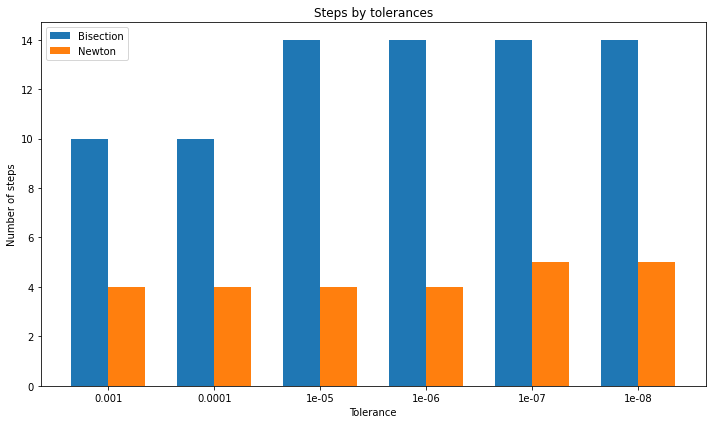

In [8]:
from matplotlib import pyplot as plt
import numpy as np

tolerances = [10**(-i) for i in range(3, 9)]
bisection_all_steps = []
newton_all_steps = []
for tolerance in tolerances:
    _, _, bisection_steps = bisection(func1, 1, 2, tolerance=tolerance)
    bisection_all_steps.append(bisection_steps)
    _, newton_steps = newton(func1, func1_p, 1, tolerance=tolerance, max_steps=100)
    newton_all_steps.append(newton_steps)
    
width = 0.35  # the width of the bars
x = np.arange(len(tolerances))
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

rects1 = ax.bar(x - width/2, bisection_all_steps, width, label='Bisection')
rects2 = ax.bar(x + width/2, newton_all_steps, width, label='Newton')

ax.set_ylabel('Number of steps')
ax.set_xlabel('Tolerance')
ax.set_title('Steps by tolerances')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in tolerances])
ax.legend()

fig.tight_layout()

plt.show()

### Bisekcja - różne wartości przedziału

In [9]:
print('\tDIFFERENT LENGTH OF INTERVAL')
print(f'For function "x**3 - x - 1" on [1, 2]: {bisection(func1, 1, 2)}')
print(f'For function "x**3 - x - 1" on [0, 4]: {bisection(func1, 0, 4)}')
print(f'For function "x**3 - x - 1" on [-10, 10]: {bisection(func1, -10, 10)}')
print(f'For function "x**3 - x - 1" on [0, 200]: {bisection(func1, 0, 200)}')
print('\tSAME LENGTH, DIFFERENT POINTS')
print(f'For function "x**3 - x - 1" on [0, 5.2988]: {bisection(func1, 0, 5.2988)}')
print(f'For function "x**3 - x - 1" on [1, 6.2988]: {bisection(func1, 1, 6.2988)}')
print(f'For function "x**3 - x - 1" on [-100, 100]: {bisection(func1, -100, 100)}')
print(f'For function "x**3 - x - 1" on [0, 200]: {bisection(func1, 0, 200)}')

	DIFFERENT LENGTH OF INTERVAL
For function "x**3 - x - 1" on [1, 2]: (1.32470703125, 0.00048828125, 10)
For function "x**3 - x - 1" on [0, 4]: (1.32470703125, 0.00048828125, 12)
For function "x**3 - x - 1" on [-10, 10]: (1.3247299194335938, 3.814697265625e-05, 18)
For function "x**3 - x - 1" on [0, 200]: (1.3247013092041016, 4.76837158203125e-05, 21)
	SAME LENGTH, DIFFERENT POINTS
For function "x**3 - x - 1" on [0, 5.2988]: (1.3247, 1.3247, 1)
For function "x**3 - x - 1" on [1, 6.2988]: (1.3247067382812499, 0.001293652343750007, 11)
For function "x**3 - x - 1" on [-100, 100]: (1.3247013092041016, 4.76837158203125e-05, 21)
For function "x**3 - x - 1" on [0, 200]: (1.3247013092041016, 4.76837158203125e-05, 21)


### Bisekcja - różne wartości tolerancji

In [86]:
print(f'For function "x**3 - x - 1" on [1, 2], tolerance=1: {bisection(func1, 1, 2, 1)}')
print(f'For function "x**3 - x - 1" on [1, 2], tolerance=1e-1: {bisection(func1, 1, 2, 1e-1)}')
print(f'For function "x**3 - x - 1" on [1, 2], tolerance=1e-2: {bisection(func1, 1, 2, 1e-2)}')
print(f'For function "x**3 - x - 1" on [1, 2], tolerance=1e-4: {bisection(func1, 1, 2, 1e-4)}')
print(f'For function "x**3 - x - 1" on [1, 2], tolerance=1e-8: {bisection(func1, 1, 2, 1e-8)}')

For function "x**3 - x - 1" on [1, 2], tolerance=1: (1.5, 0.5, 0)
For function "x**3 - x - 1" on [1, 2], tolerance=1e-1: (1.3125, 0.0625, 3)
For function "x**3 - x - 1" on [1, 2], tolerance=1e-2: (1.32421875, 0.00390625, 7)
For function "x**3 - x - 1" on [1, 2], tolerance=1e-4: (1.32470703125, 0.00048828125, 10)
For function "x**3 - x - 1" on [1, 2], tolerance=1e-8: (1.324737548828125, 3.0517578125e-05, 14)


### Metoda Newtona-Raphsona - różne wartości tolerancji

In [88]:
print(f'For function "x**3 - x - 1" with starting point x=1, tolerance=1: {newton(func1, func1_p, 1, 1)}')
print(f'For function "x**3 - x - 1" with starting point x=1, tolerance=1e-2: {newton(func1, func1_p, 1, 1e-2)}')
print(f'For function "x**3 - x - 1" with starting point x=1, tolerance=1e-4: {newton(func1, func1_p, 1, 1e-4)}')
print(f'For function "x**3 - x - 1" with starting point x=1, tolerance=1e-8: {newton(func1, func1_p, 1, 1e-8)}')
print(f'For function "x**3 - x - 1" with starting point x=1, tolerance=1e-16: {newton(func1, func1_p, 1, 1e-16)}')

For function "x**3 - x - 1" with starting point x=1, tolerance=1: (1, 0)
For function "x**3 - x - 1" with starting point x=1, tolerance=1e-2: (1.325200398950907, 3)
For function "x**3 - x - 1" with starting point x=1, tolerance=1e-4: (1.3247181739990537, 4)
For function "x**3 - x - 1" with starting point x=1, tolerance=1e-8: (1.3247179572447898, 5)
For function "x**3 - x - 1" with starting point x=1, tolerance=1e-16: (None, 7)


### Metoda Newtona-Raphsona - różne punkty początkowe

In [96]:
print(f'For function "x**3 - x - 1" with starting point x=1: {newton(func1, func1_p, 1)}')
print(f'For function "x**3 - x - 1" with starting point x=3: {newton(func1, func1_p, 3)}')
print(f'For function "x**3 - x - 1" with starting point x=5: {newton(func1, func1_p, 5)}')
print(f'For function "x**3 - x - 1" with starting point x=10: {newton(func1, func1_p, 10)}')

For function "x**3 - x - 1" with starting point x=1: (1.3247181739990537, 4)
For function "x**3 - x - 1" with starting point x=3: (1.3247233751392644, 5)
For function "x**3 - x - 1" with starting point x=5: (1.3247824004934001, 6)
For function "x**3 - x - 1" with starting point x=10: (None, 7)
